In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('telco_data.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [8]:
sum_monthlycharges = df['MonthlyCharges'].sum()
sum_monthlycharges 

456116.6

In [9]:
class Churn_analysis:
    def __init__(self,df):
        self.df= df
    def gender_count(self):
        return df['gender'].value_counts().reset_index()
    def av_mcharges(self):
        return df['MonthlyCharges'].mean()
    #What is the average tenure of customers who churn vs. those who stay?
    def churn_vs_stay(self):
        return df.groupby('Churn')['tenure'].mean().reset_index()
    def contract_cnt(self):
        return df['Contract'].value_counts().reset_index()
    def histogram_graph(self,col):
        return sns.histplot(data=df,x=col,bins= 20, color = 'skyblue')
    def snr_citizen(self):
        return df[df['SeniorCitizen']==1].groupby('gender').size().reset_index()
    def bar_graph(self):
        payment_cnt = df['PaymentMethod'].value_counts()
        plt.figure(figsize = (10,5))
        return sns.barplot(x=payment_cnt.index,y=payment_cnt.values)

female_male_count:
   gender  count
0    Male   3555
1  Female   3488
avg_monthly_charges:
64.76169246059918
churn_vs_stay_cnt:
  Churn     tenure
0    No  37.569965
1   Yes  17.979133
Contract_count:
         Contract  count
0  Month-to-month   3875
1        Two year   1695
2        One year   1473
histogram_graph:
Axes(0.125,0.11;0.775x0.77)
senior_count:
   gender    0
0  Female  568
1    Male  574
barplot:
Axes(0.125,0.11;0.775x0.77)


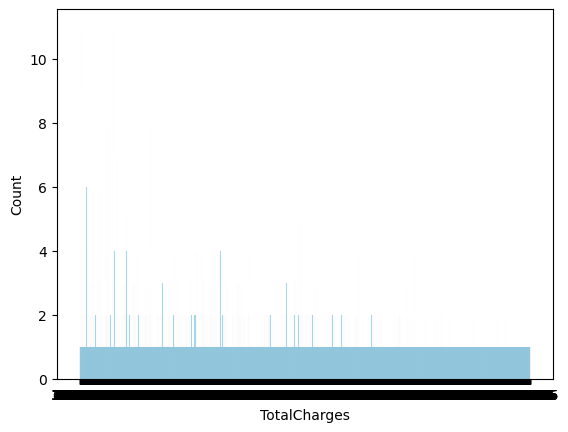

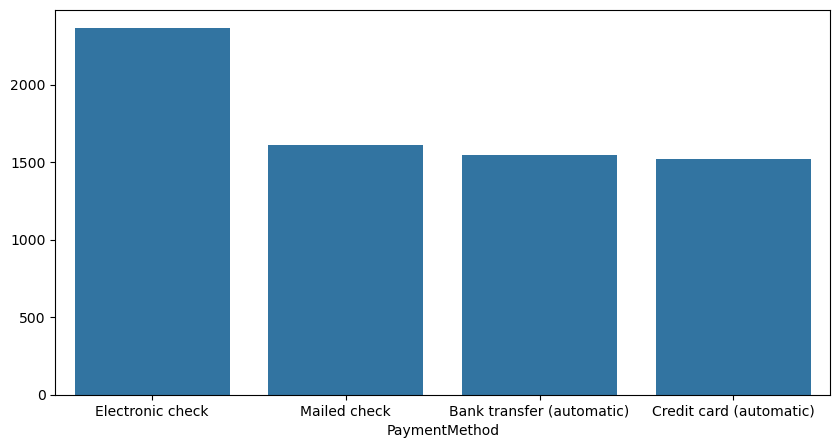

In [10]:
obj_ram = Churn_analysis(df)

print('female_male_count:')
print(obj_ram.gender_count())

print('avg_monthly_charges:')
print(obj_ram.av_mcharges())

print('churn_vs_stay_cnt:')
print(obj_ram.churn_vs_stay())

print('Contract_count:')
print(obj_ram.contract_cnt())

print('histogram_graph:')
print(obj_ram.histogram_graph('TotalCharges'))

print('senior_count:')
print(obj_ram.snr_citizen())

print('barplot:')
print(obj_ram.bar_graph())
